In [1]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt

from dataloader import prepare_data, create_generators, visualize_images


# Select classes and prepare data
classes = ["Angelina Jolie", "Brad Pitt", "Denzel Washington",
           "Hugh Jackman", "Jennifer Lawrence"]
prepare_data(classes)

# Create data generators
train_dir = "train_data"
test_dir = "test_data"
train_generator, test_generator = create_generators(train_dir, test_dir)

C:\Users\sarah\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Found 500 images belonging to 5 classes.
Found 339 images belonging to 5 classes.


In [2]:
# Load MobileNet model with pre-trained ImageNet weights
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

C:\Users\sarah\AppData\Local\Temp/ipykernel_14392/3288716672.py:2: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(150, 150, 3))


17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
# Freeze the base model
base_model.trainable = False

In [4]:
# Add custom classifier on top of MobileNet
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(128, activation='relu')(x)
predictions = Dense(len(classes), activation='softmax')(x)

In [5]:
# Create the model
model = Model(inputs=base_model.input, outputs=predictions)

In [6]:
# Compile the model
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
# Define callbacks
checkpoint = ModelCheckpoint("mobilenet_model.keras", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)

In [9]:
# Train the model
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=test_generator,
    callbacks=[checkpoint, early_stopping]
)

Epoch 1/20


C:\Users\sarah\anaconda3\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step - accuracy: 0.3540 - loss: 1.6433
Epoch 1: val_accuracy improved from -inf to 0.79941, saving model to mobilenet_model.keras
25/25 ━━━━━━━━━━━━━━━━━━━━ 13s 386ms/step - accuracy: 0.3596 - loss: 1.6276 - val_accuracy: 0.7994 - val_loss: 0.5173
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - accuracy: 0.8282 - loss: 0.4771
Epoch 2: val_accuracy improved from 0.79941 to 0.86136, saving model to mobilenet_model.keras
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 235ms/step - accuracy: 0.8289 - loss: 0.4758 - val_accuracy: 0.8614 - val_loss: 0.3704
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - accuracy: 0.9030 - loss: 0.2872
Epoch 3: val_accuracy improved from 0.86136 to 0.96165, saving model to mobilenet_model.keras
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 233ms/step - accuracy: 0.9033 - loss: 0.2866 - val_accuracy: 0.9617 - val_loss: 0.1685
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - accuracy: 0.9666 - loss: 0.1538
Epoch 4: val_accuracy improved from 

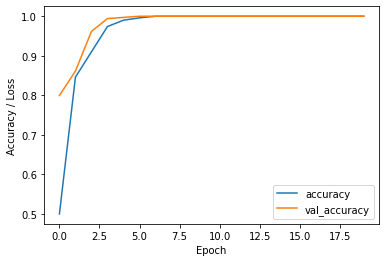

In [11]:
# Plot learning curves
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy / Loss')
plt.legend()
plt.show()

In [12]:
# Save the model
model.save("mobilenet_model.h5")